# Panel 1

In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from LRGSG_package.LRGSG_plots import imshow_colorbar_caxdivider
from LRGSG_package.LRGSG_utils import move_to_rootf, width_interval
from LRGSG_package.nx_patches import signed_spectral_layout, signedlaplacian_spectrum
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


### Fig. a

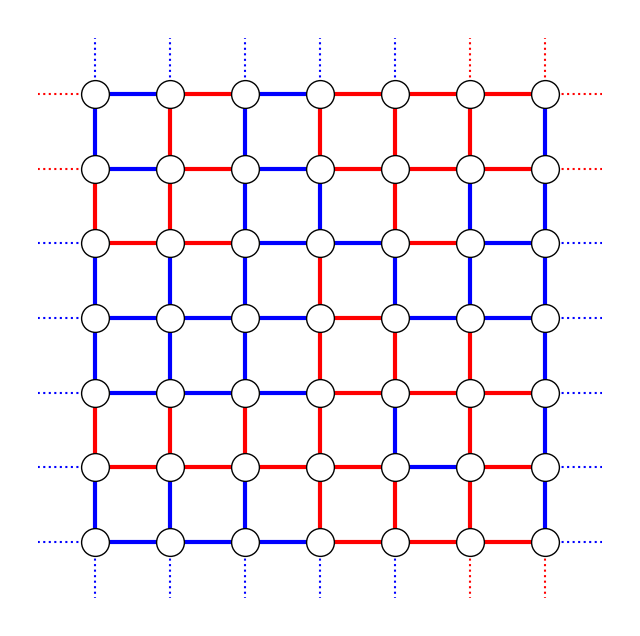

In [2]:
figpath = "data/plot/paper/panel_1/"
size_grid = 6
fig, ax = plt.subplots(figsize=(8, 8))
plot_square_lattice(ax, size=7)
os.makedirs(figpath, exist_ok=True)
fig.savefig(
    f"{figpath}disordered_grid{size_grid}.pdf",
    bbox_inches="tight",
    pad_inches=-0.1,
)

### Fig. b

#### Smoothing tests

In [11]:
sqlatt = Lattice2D(side1=64, pflip=0.1)
sla = SignedLaplacianAnalysis(sqlatt)
number_of_averages = 100
out_suffix = ""
file_path = f"{sqlatt.lrgsgpath}avgC_{number_of_averages}_p={sqlatt.pflip:.3g}_{out_suffix}.npz"

In [12]:
# file_path = 'test_file.npz'

loaded_file = np.load(file_path)

loaded_arrays = []
for i in range(number_of_averages):
    array = loaded_file[f'arr_{i}']
    loaded_arrays.append(array)

loaded_file.close()


(1000.0, 10000.0)

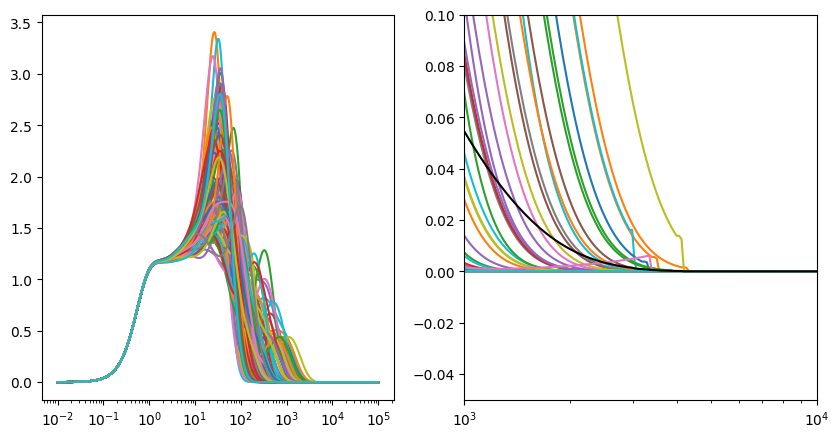

In [13]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
y_values = loaded_arrays[:]
if type(y_values) is np.ndarray:
    ax[0].plot(sla.tTsC, y_values)
elif type(y_values) is list:
    for i in y_values:
        ax[0].plot(sla.tTsC, i)
ax[0].set_xscale('log')
thresh = 2e-2
# sel_vals = [y_values for y_values in loaded_arrays if all(y_values[np.where(np.abs(np.diff(y_values)) == y_values[:-1])] < thresh)]
for y_values in loaded_arrays:
    ax[1].plot(sla.tTsC, y_values)
ax[1].plot(sla.tTsC, np.mean(loaded_arrays, axis=0), 'k')
ax[1].set_xscale('log')
ax[1].set_ylim(-0.05, 0.1)
ax[1].set_xlim(1e3, 1e4)

In [10]:
listplot = []
for i in range(10):
    sqlatt = Lattice2D(
        side1=64, 
        pflip=0.11)
    sqlatt.flip_random_fract_edges()
    sla = SignedLaplacianAnalysis(sqlatt)
    sla.compute_Cspe()
    listplot.append([sla.tTsC, sla.Cspe])

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/src/LRGSG_package/LRGSG.py:126: RuntimeWarning: divide by zero encountered in log
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(self.system.N)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/src/LRGSG_package/LRGSG.py:126: RuntimeWarning: invalid value encountered in multiply
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(self.system.N)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/src/LRGSG_package/LRGSG.py:123: RuntimeWarning: invalid value encountered in divide
  rho = np.divide(rhoTr, Tr)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/src/LRGSG_package/LRGSG.py:124: RuntimeWarning: invalid value encountered in scalar divide
  avgrho = np.nansum(np.multiply(w, rhoTr)) / Tr
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/src/LRGSG_package/LRGSG.py:125: RuntimeWarning: invalid value encountered in scalar divide
  av2rho = np.nansum(np.multiply(np.multiply(w, w), rhoTr)) / 

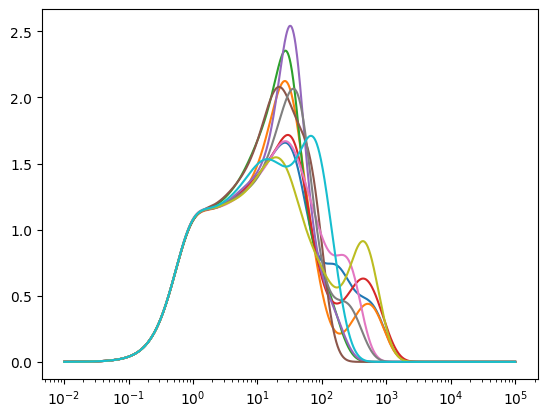

In [4]:
for i in range(10):
    plt.plot(listplot[i][0], medfilt(listplot[i][1]))
plt.xscale('log')

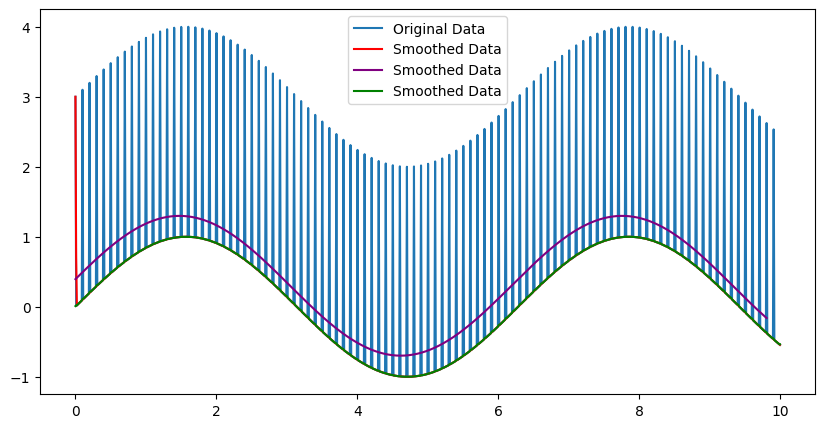

In [125]:
def plot_average(data):
    """
    Plots the pointwise average of y-coordinates against x-coordinates.

    Parameters:
    -----------
    data : list of lists
        Each sublist contains two arrays: [x-coordinates, y-coordinates].

    Returns:
    --------
    None
        The function creates a plot.

    Raises:
    -------
    ValueError
        If x-coordinates in the data are not identical.

    Example:
    --------
    data = [
        [np.array([1, 2, 3]), np.array([2, 3, 4])],
        [np.array([1, 2, 3]), np.array([4, 5, 6])]
    ]
    plot_average(data)
    """
    # Check if all x-coordinates are identical
    x_coords = [item[0] for item in data]
    if not all(np.array_equal(x_coords[0], x) for x in x_coords):
        raise ValueError("All x-coordinates must be identical for pointwise averaging")

    # Compute pointwise average of y-coordinates
    y_coords = [item[1] for item in data]
    avg_y = np.mean(y_coords, axis=0)
    return x_coords[0], avg_y
    # Plot the average y-coordinates against x-coordinates

from scipy import interpolate

def remove_spikes(x, y, threshold):
    # Identify outliers
    diff = np.abs(np.diff(y, n=1))
    indices = np.where(diff > threshold)[0]

    # Remove outliers
    x_new = np.delete(x, indices+1)
    y_new = np.delete(y, indices+1)

    # Interpolate
    f = interpolate.interp1d(x_new, y_new, kind='cubic')
    y_smooth = f(x)

    return y_smooth
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

from scipy.signal import medfilt

def median_filter(data, kernel_size=3):
    return medfilt(data, kernel_size=kernel_size)

import matplotlib.pyplot as plt
import numpy as np

# Example data with spikes
x = np.linspace(0, 10, 1000)
y = np.sin(x)  # Adding noise
y[::10] += 3  # Adding spikes

# Smooth the data
y_smooth = remove_spikes(x, y, threshold=1.5)  # Change the threshold as needed
y_smooth2 = moving_average(y, 20)
y_smooth3 = medfilt(y)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original Data')
plt.plot(x, y_smooth, label='Smoothed Data', color='red')
plt.plot(x[:-(20-1)], y_smooth2, label='Smoothed Data', color='purple')
plt.plot(x, y_smooth3, label='Smoothed Data', color='green')
plt.legend()
plt.show()

### Fig. c

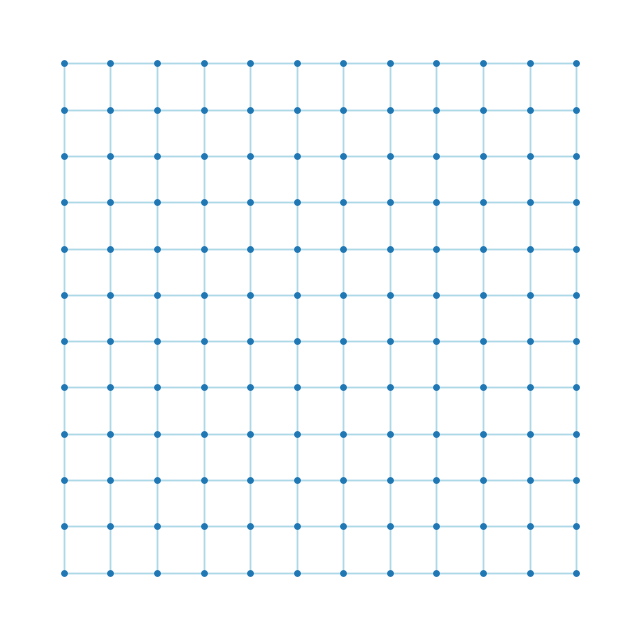

In [5]:
side = 12
sqlatt = Lattice2D(#
    side1 = side,
    geometry = 'squared',
)

G = sqlatt.G
G_edges_ww = G.edges(data='weight')
edgecol = ['lightblue' if e[2] > 0 else 'r' for e in G_edges_ww]

fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(G, 
        pos=sqlatt.posG, 
        ax=ax,  
        edge_color=edgecol, 
        node_color=None,  
        node_size=15,
        with_labels=False)

In [6]:
import matplotlib.pyplot as plt
import numpy as np






